In [1]:
import torch
from doctr.models import crnn_mobilenet_v3_large
from doctr.models import recognition_predictor
from doctr.io import DocumentFile
import matplotlib.pyplot as plt
from doctr.datasets import VOCABS


# Add Tifinagh characters to VOCAB
VOCABS['Tifinagh-IRCAM'] = "ⴰⴱⴳⴷⴹⴻⴼⴽⵀⵃⵄⵅⵇⵉⵊⵍⵎⵏⵓⵔⵕⵖⵙⵚⵛⵜⵟⵡⵢⵣⵥⵯ"
VOCABS['tamazight'] = VOCABS["english"] + VOCABS['Tifinagh-IRCAM']

# Load custom recognition model
reco_model = crnn_mobilenet_v3_large(pretrained=False, pretrained_backbone=False, vocab=VOCABS['tamazight'])
reco_params = torch.load('crnn_mobilenet_v3_large_printed.pt', map_location="cpu")
reco_model.load_state_dict(reco_params)
#predictor = ocr_predictor(reco_arch=reco_model, pretrained=True)
reco_predictor = recognition_predictor(reco_model, pretrained=True)

(-0.5, 168.5, 49.5, -0.5)

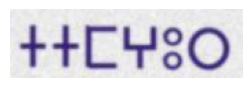

In [14]:
image_path = "val/images/4.jpg"
input_page = DocumentFile.from_images(image_path)[0]

# Display the input image
plt.figure(figsize=(3, 3))
plt.imshow(input_page)
plt.axis('off')

In [15]:
out = reco_predictor([input_page])

In [16]:
print(f"Prediction: {out[0][0]}\nConfidence: {out[0][1]:.2f}")

Prediction: ⵜⵜⵎⵖⵓⵔ
Confidence: 0.94
